In [9]:
#import necessary libraries and data
import pandas as pd

df = pd.read_csv("../data/raw/cdmx_real_estate_synthetic.csv")

df.head()


,property_id,borough,property_type,level,area_m2,rooms,bathrooms,parking_spots,elevator,balcony,...,zone_avg_price_m2,price_m2,relative_price_index,price_bucket,listing_date,sold_date,days_on_market,price_drop_count,final_discount_pct,status
0,1,Coyoacán,apartment,PB,137,1.0,1,1.0,0.0,0.0,...,42819.330756,44457.952131,1.038268,"(5000000.0, 8000000.0]",2025-01-15,2025-01-22,7,0.0,0.000000,sold
1,2,Iztapalapa,apartment,2,116,3.0,2,1.0,1.0,0.0,...,33544.809536,31122.713492,0.927795,"(3000000.0, 5000000.0]",2025-06-21,2025-07-13,22,0.0,0.000000,sold
2,3,Álvaro Obregón,apartment,1,135,2.0,2,1.0,0.0,1.0,...,43674.584611,45642.900136,1.045068,"(5000000.0, 8000000.0]",2025-03-23,2025-04-02,10,0.0,0.000000,sold
3,4,Álvaro Obregón,apartment,PB,78,NaN,2,1.0,0.0,0.0,...,39300.140831,43517.827214,1.107320,"(3000000.0, 5000000.0]",2025-01-05,2025-01-23,18,0.0,0.000000,sold
4,5,Miguel Hidalgo,apartment,1,61,4.0,4,0.0,1.0,1.0,...,55971.755889,53894.896734,0.962895,"(3000000.0, 5000000.0]",2025-03-31,2025-04-30,30,0.0,0.028427,sold


In [10]:
#check the shape of the data
df.shape

(1200, 25)

In [11]:
#check the columns of the data
df.columns

Index(['property_id', 'borough', 'property_type', 'level', 'area_m2', 'rooms',
       'bathrooms', 'parking_spots', 'elevator', 'balcony',
       'property_condition', 'estimated_rehab_cost_pct', 'near_main_avenue',
       'near_metro', 'price', 'zone_avg_price_m2', 'price_m2',
       'relative_price_index', 'price_bucket', 'listing_date', 'sold_date',
       'days_on_market', 'price_drop_count', 'final_discount_pct', 'status'],
      dtype='object')

All column names follow a consistent format, so no renaming is required before analysis.

In [12]:
#check column data types
df.dtypes

property_id                   int64
borough                      object
property_type                object
level                        object
area_m2                       int64
rooms                       float64
bathrooms                     int64
parking_spots               float64
elevator                    float64
balcony                     float64
property_condition           object
estimated_rehab_cost_pct    float64
near_main_avenue            float64
near_metro                  float64
price                       float64
zone_avg_price_m2           float64
price_m2                    float64
relative_price_index        float64
price_bucket                 object
listing_date                 object
sold_date                    object
days_on_market                int64
price_drop_count            float64
final_discount_pct          float64
status                       object
dtype: object

Some discrete variables like `rooms` and `parking_spots` appear as `float64` because of missing values. These will be safely converted to integers after handling nulls.

In [13]:
#view a random sample of 5 rows
df.sample(5)

,property_id,borough,property_type,level,area_m2,rooms,bathrooms,parking_spots,elevator,balcony,...,zone_avg_price_m2,price_m2,relative_price_index,price_bucket,listing_date,sold_date,days_on_market,price_drop_count,final_discount_pct,status
564,565,Miguel Hidalgo,apartment,PB,75,4.0,4,1.0,0.0,0.0,...,64014.576140,57877.359018,0.904128,"(3000000.0, 5000000.0]",2025-04-25,2025-05-08,13,0.0,0.000000,sold
606,607,Álvaro Obregón,apartment,2,116,2.0,3,1.0,1.0,1.0,...,46516.490563,51243.533243,1.101621,"(5000000.0, 8000000.0]",2025-01-02,2025-01-29,27,1.0,0.002717,sold
604,605,Iztapalapa,apartment,PB,103,2.0,3,2.0,0.0,0.0,...,35951.557680,34926.559010,0.971489,"(3000000.0, 5000000.0]",2025-05-14,2025-06-19,36,1.0,0.033565,sold
357,358,Álvaro Obregón,apartment,1,66,4.0,4,1.0,1.0,0.0,...,40354.118182,39040.024117,0.967436,"(0.0, 3000000.0]",2025-01-15,2025-02-03,19,0.0,0.000000,sold
473,474,Miguel Hidalgo,apartment,1,82,2.0,2,2.0,1.0,0.0,...,66092.317953,69557.419060,1.052428,"(5000000.0, 8000000.0]",2025-01-10,2025-02-15,36,0.0,0.009663,sold


In [14]:
df.isna().sum().sort_values(ascending=False)


balcony                     127
parking_spots               103
price_drop_count             81
elevator                     80
near_main_avenue             62
estimated_rehab_cost_pct     61
near_metro                   59
rooms                        46
price_m2                      0
final_discount_pct            0
days_on_market                0
sold_date                     0
listing_date                  0
price_bucket                  0
relative_price_index          0
property_id                   0
zone_avg_price_m2             0
price                         0
borough                       0
property_condition            0
bathrooms                     0
area_m2                       0
level                         0
property_type                 0
status                        0
dtype: int64

Some missing values represent the absence of a feature (e.g. `balcony`), while others could indicate incomplete records (e.g. `rooms`). These cases will be treated differently during cleaning.


### Data Cleaning Strategy

The goal of this cleaning step is to prepare the dataset for analysis. We focus on handling missing values, correcting data types.

In [15]:
#Copy original dataframe to preserve raw data
df_clean = df.copy()

#Fill binary variables assuming absence when missing
binary_cols = ["balcony", "elevator", "near_main_avenue", "near_metro"]
df_clean[binary_cols] = df_clean[binary_cols].fillna(0)

#Fill count features with zero when missing
count_cols = ["parking_spots", "price_drop_count"]
df_clean[count_cols] = df_clean[count_cols].fillna(0)

#Drop rows with missing critical information
df_clean = df_clean.dropna(subset=["rooms"])

#Fill rehab cost nulls with zero assuming no rehab needed
df_clean["estimated_rehab_cost_pct"] = df_clean["estimated_rehab_cost_pct"].fillna(0)

#Cast data types
int_cols = ["rooms", "parking_spots", "price_drop_count"] + binary_cols
df_clean[int_cols] = df_clean[int_cols].astype(int)

#Check for remaining nulls
df_clean.isna().sum().sort_values(ascending=False)


property_id                 0
near_metro                  0
final_discount_pct          0
price_drop_count            0
days_on_market              0
sold_date                   0
listing_date                0
price_bucket                0
relative_price_index        0
price_m2                    0
zone_avg_price_m2           0
price                       0
near_main_avenue            0
borough                     0
estimated_rehab_cost_pct    0
property_condition          0
balcony                     0
elevator                    0
parking_spots               0
bathrooms                   0
rooms                       0
area_m2                     0
level                       0
property_type               0
status                      0
dtype: int64

In [16]:
#Save cleaned dataframe to new CSV
df_clean.to_csv("../data/processed/cdmx_real_estate_clean.csv", index=False)

## SQL Layer for Analytical Queries

In this project, analytical questions are answered using SQL instead of only pandas operations, separating data storage from business logic.

We load the cleaned dataset into a local SQLite database and run SQL queries to explore market liquidity (Time on Market) based on property characteristics. These queries will later feed stakeholder-style visualizations.


In [17]:
# Create a local SQLite database connection
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/processed/real_estate.db")


In [18]:
# Load cleaned dataframe into SQL table
df_clean = pd.read_csv("../data/processed/cdmx_real_estate_clean.csv")

df_clean.to_sql("properties", conn, if_exists="replace", index=False)


1154

In [19]:
# Example query to verify data load
pd.read_sql("""
SELECT COUNT(*) AS total_properties 
FROM properties
""", conn)



,total_properties
0,1154


In [20]:
# Example query to analyze average days on market by borough
pd.read_sql("""
SELECT 
    borough, 
    ROUND(AVG(days_on_market), 2) AS avg_days_on_market,
    COUNT(*) AS total_listings
FROM properties
GROUP BY borough
ORDER BY avg_days_on_market
""", conn)


,borough,avg_days_on_market,total_listings
0,Álvaro Obregón,20.32,191
1,Benito Juárez,20.89,193
2,Cuauhtémoc,21.03,202
3,Coyoacán,21.96,186
4,Miguel Hidalgo,22.44,190
5,Iztapalapa,23.23,192


## Business Questions & Market Insights

At this stage, the dataset is cleaned and loaded into a SQL layer. The next step is to translate business intuition into analytical questions that help understand liquidity in the CDMX flipping market.

Instead of exploring data randomly, each analysis starts with a concrete business question. A SQL query is used to answer it, and the result is visualized to communicate insights to stakeholders such as investors, brokers, or acquisition teams.

The main objective is to understand which property characteristics reduce Time on Market (TOM) and increase capital rotation speed in a flipping strategy.

## Analytical Roadmap

The analysis follows a top-down approach. We begin with a general view of Time on Market (TOM) across the CDMX flipping market, then progressively segment by location, price, and property characteristics to uncover the main drivers of liquidity.

Time on Market is the core Key Performance Indicator of this project. In a flipping business, performance is not only defined by profit per transaction, but also by capital velocity. The faster a property is sold, the sooner capital can be reinvested into the next opportunity, increasing total returns over time.

Therefore, this analysis focuses on identifying which characteristics consistently reduce TOM and improve capital rotation efficiency rather than just absolute pricing outcomes.

Before running any analysis, it is important to understand the business context. Data exploration without a clear economic objective can lead to misleading conclusions.


### Question — What is the baseline liquidity of the CDMX flipping market?

Before segmenting the market, we compute descriptive statistics for Time on Market (TOM) to understand the typical selling time, dispersion, and potential asymmetries. This provides a numerical baseline of liquidity before visual exploration.


In [21]:
#Descriptive statistics for days on market
df_tom_stats = pd.read_sql("""
SELECT 
    COUNT(*)                     AS total_properties,
    ROUND(AVG(days_on_market),2) AS avg_days_on_market,
    MIN(days_on_market)          AS min_days_on_market,
    MAX(days_on_market)          AS max_days_on_market,

    
        (
        SELECT days_on_market
        FROM properties
        GROUP BY days_on_market
        ORDER BY COUNT(*) DESC
        LIMIT 1
    ) AS mode_days_on_market

FROM properties
""", conn)

df_tom_stats


,total_properties,avg_days_on_market,min_days_on_market,max_days_on_market,mode_days_on_market
0,1154,21.64,7,72,13


**Insight:**  
The mean and mode provide complementary views of liquidity. While the average reflects overall capital rotation, the mode highlights the most common selling time experienced in the market, which is often more representative in skewed real estate distributions.

In [22]:
#Query to extract days on market data
df_tom = pd.read_sql("""
SELECT 
    days_on_market
FROM properties
""", conn)


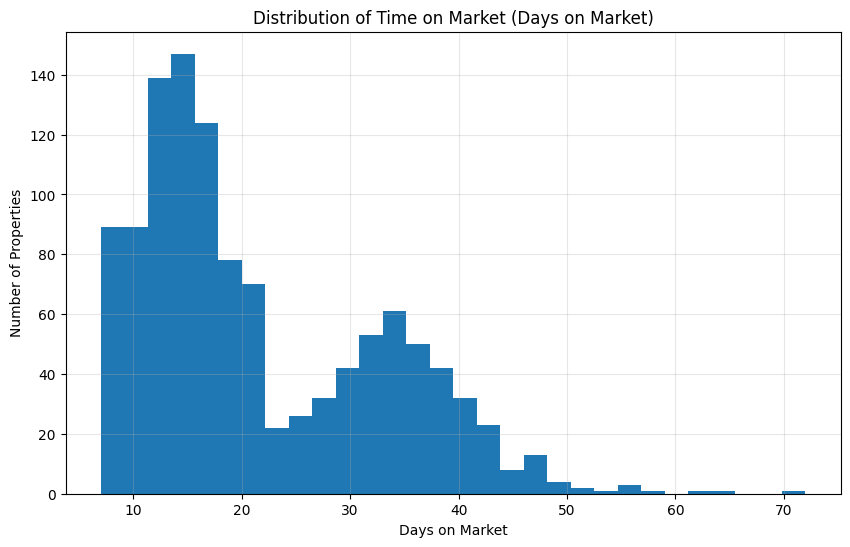

In [23]:
import matplotlib.pyplot as plt

# Plot distribution of Time on Market
plt.figure(figsize=(10,6))
plt.hist(df_tom["days_on_market"], bins=30)
plt.title("Distribution of Time on Market (Days on Market)")
plt.xlabel("Days on Market")
plt.ylabel("Number of Properties")
plt.grid(True, alpha=0.3)
plt.show()


**Insight:**  

The distribution of Time on Market is not uniform and does not follow a simple bell shape. Instead, it shows multiple clusters and a long tail. This behavior reflects the fact that the dataset mixes different types of properties across zones, price ranges, and physical characteristics.

In other words, there is no single “market” dynamic. Fast-selling, normal, and slow-moving properties coexist, each driven by different business conditions. Therefore, understanding TOM requires moving from a global view to more specific segments such as location, price positioning, and property features.


### Question — How does Time on Market vary by borough?

After observing that Time on Market (TOM) is heterogeneous across the market, the next step is to evaluate whether location explains part of this variability.

By segmenting TOM by borough, we assess which areas show faster capital rotation and which tend to accumulate slower-moving inventory. This helps identify zones that are structurally more liquid for a flipping strategy.


In [24]:
#Query to analyze average days on market by borough
df_borough = pd.read_sql("""
SELECT 
    borough,
    ROUND(AVG(days_on_market), 2) AS avg_days_on_market,
    COUNT(*) AS total_properties
FROM properties
GROUP BY borough
ORDER BY avg_days_on_market
""", conn)

df_borough


,borough,avg_days_on_market,total_properties
0,Álvaro Obregón,20.32,191
1,Benito Juárez,20.89,193
2,Cuauhtémoc,21.03,202
3,Coyoacán,21.96,186
4,Miguel Hidalgo,22.44,190
5,Iztapalapa,23.23,192


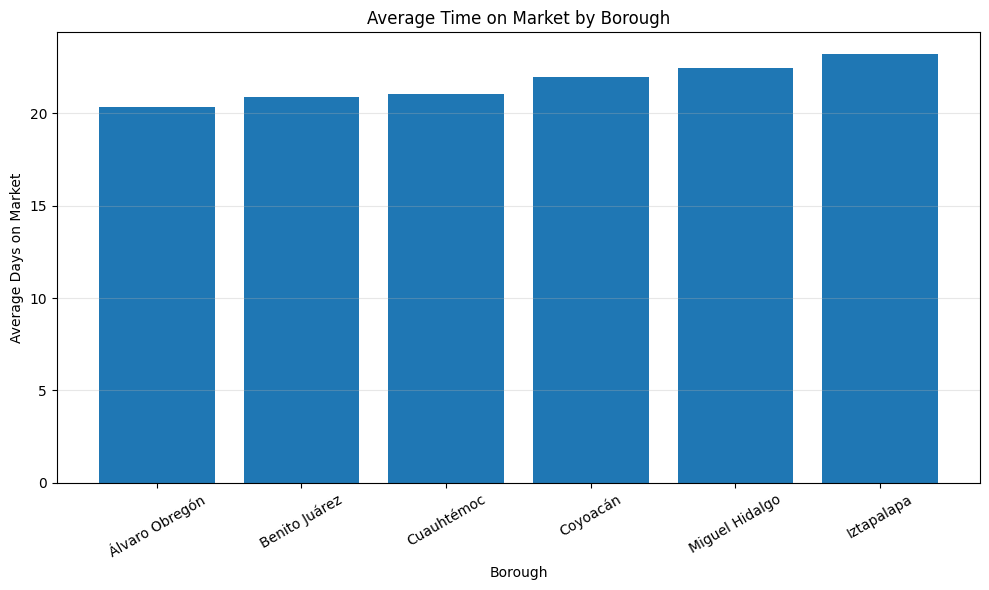

In [25]:
# Plot average days on market by borough

plt.figure(figsize=(10,6))
plt.bar(df_borough["borough"], df_borough["avg_days_on_market"])
plt.title("Average Time on Market by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Days on Market")
plt.xticks(rotation=30)
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Although average TOM by borough shows limited differences, averages can hide internal variability. To better understand liquidity dynamics within each location, we analyze the full distribution of Time on Market using boxplots.


In [26]:
#Query to extract days on market data with boroughs
df_borough_dist = pd.read_sql("""
SELECT 
    borough,
    days_on_market
FROM properties
""", conn)

df_borough_dist.head()


,borough,days_on_market
0,Coyoacán,7
1,Iztapalapa,22
2,Álvaro Obregón,10
3,Miguel Hidalgo,30
4,Miguel Hidalgo,18


<Figure size 1100x600 with 0 Axes>

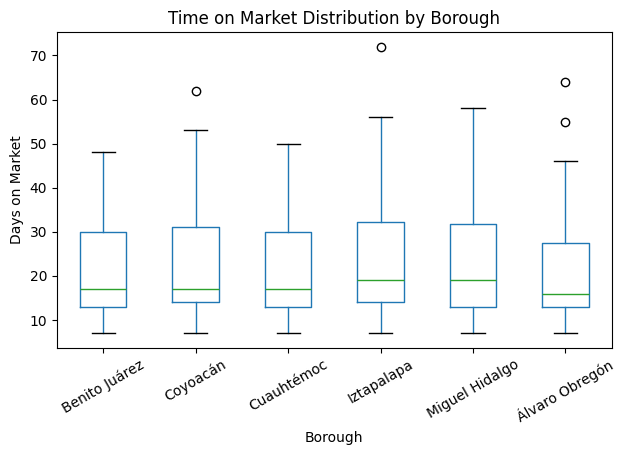

In [27]:
# Plot boxplot of days on market by borough

plt.figure(figsize=(11,6))

df_borough_dist.boxplot(
    column="days_on_market",
    by="borough",
    grid=False
)

plt.title("Time on Market Distribution by Borough")
plt.suptitle("")
plt.xlabel("Borough")
plt.ylabel("Days on Market")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Insight:**  

The distributions of Time on Market across boroughs are highly similar. Medians cluster in a narrow range, and the interquartile ranges overlap strongly across all locations. This suggests that borough alone does not explain liquidity differences in the flipping market.

What does affect the perceived averages are a small number of slow-moving properties that create long right tails and visible outliers in several boroughs (e.g., extreme cases above 55–70 days). These properties disproportionately shift summary statistics without representing the typical market behavior.

In practice, this means that liquidity is driven less by where the property is located and more by how it is positioned within each borough — including price, layout, amenities, and condition.


### Question — How does price positioning affect Time on Market?

In flipping strategies, liquidity is highly sensitive to price positioning. Even small deviations from the market reference can significantly increase holding time and capital lock-in.

To evaluate this effect, we analyze how Time on Market behaves across different price segments. Instead of treating price as a single continuous variable, we group properties into price buckets to understand whether cheaper, mid-range, or premium units rotate capital faster in the CDMX market.


In [28]:
#Query to extract price data with buckets
df_price = pd.read_sql("""
SELECT 
    price,
    days_on_market,
    CASE 
        WHEN price < 2500000 THEN 'Low'
        WHEN price BETWEEN 2500000 AND 3500000 THEN 'Mid-Low'
        WHEN price BETWEEN 3500000 AND 4500000 THEN 'Mid-High'
        ELSE 'High'
    END AS price_bucket
FROM properties
""", conn)

df_price.head()


,price,days_on_market,price_bucket
0,6.090739e+06,7,High
1,3.610235e+06,22,Mid-High
2,6.161792e+06,10,High
3,3.287589e+06,30,Mid-Low
4,6.039126e+06,18,High


In [29]:
# Analyze average days on market by price bucket
df_price_agg = (
    df_price
    .groupby("price_bucket")
    .agg(
        avg_days_on_market=("days_on_market", "mean"),
        mode_days_on_market=("days_on_market", lambda x: x.mode().iloc[0]),
        total_properties=("days_on_market", "count")
    )
    .reset_index()
)

df_price_agg


,price_bucket,avg_days_on_market,mode_days_on_market,total_properties
0,High,22.170819,13,562
1,Low,20.607143,17,84
2,Mid-High,22.156934,14,274
3,Mid-Low,20.115385,13,234


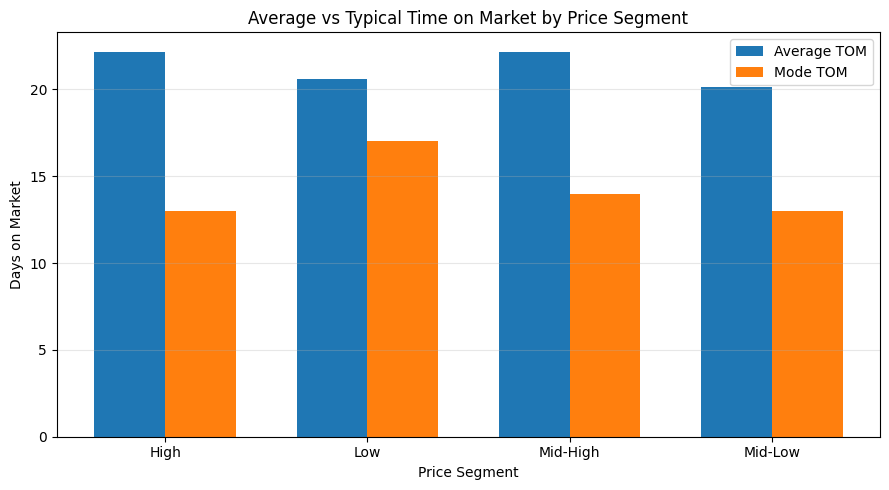

In [30]:
import numpy as np
# Plot average vs typical days on market by price bucket
x = np.arange(len(df_price_agg["price_bucket"]))
width = 0.35

plt.figure(figsize=(9,5))

plt.bar(x - width/2, df_price_agg["avg_days_on_market"], width, label="Average TOM")
plt.bar(x + width/2, df_price_agg["mode_days_on_market"], width, label="Mode TOM")

plt.xticks(x, df_price_agg["price_bucket"])
plt.xlabel("Price Segment")
plt.ylabel("Days on Market")
plt.title("Average vs Typical Time on Market by Price Segment")
plt.legend()
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**Insight:**  

Although price segmentation introduces some variation in Time on Market, no segment shows a dominant liquidity advantage. Typical sales behavior (mode) remains consistently lower than the average across all segments, indicating that slow-moving outliers inflate mean TOM values.

This suggests that price alone is not a sufficient driver of liquidity. Instead, market rotation depends more on how properties are configured and positioned — including layout, accessibility, amenities, and condition — rather than on absolute price level.


### Question — Does ground-floor (PB) reduce Time on Market?

Accessibility is a key factor in residential demand. Ground-floor apartments (PB) tend to attract families, elderly buyers, and users seeking convenience, potentially increasing liquidity.

To validate this broker hypothesis, we compare Time on Market between ground-floor units and upper-floor units in the CDMX flipping market.


In [31]:
#Query to analyze average days on market by floor level
df_level = pd.read_sql("""
SELECT 
    CASE 
        WHEN level = 'PB' THEN 'PB'
        ELSE 'Upper Floors'
    END AS floor_group,
    ROUND(AVG(days_on_market), 2) AS avg_days_on_market,
    COUNT(*) AS total_properties
FROM properties
GROUP BY floor_group
""", conn)

df_level


,floor_group,avg_days_on_market,total_properties
0,PB,18.41,274
1,Upper Floors,22.64,880


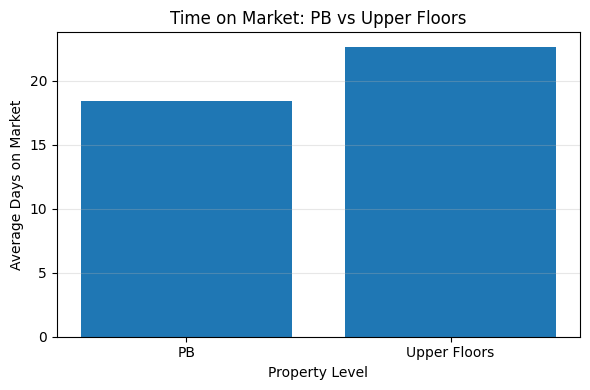

In [32]:
# Plot average days on market by floor level

plt.figure(figsize=(6,4))
plt.bar(df_level["floor_group"], df_level["avg_days_on_market"])
plt.xlabel("Property Level")
plt.ylabel("Average Days on Market")
plt.title("Time on Market: PB vs Upper Floors")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

Beyond average differences, liquidity risk is also reflected in dispersion and extreme cases. To evaluate whether PB units not only sell faster but also avoid long holding periods, we compare the full distribution of Time on Market between ground-floor and upper-floor properties.


In [33]:
#Query to extract days on market data with floor levels
df_pb_dist = pd.read_sql("""
SELECT 
    CASE 
        WHEN level = 'PB' THEN 'PB'
        ELSE 'Upper Floors'
    END AS floor_group,
    days_on_market
FROM properties
""", conn)

df_pb_dist.head()


,floor_group,days_on_market
0,PB,7
1,Upper Floors,22
2,Upper Floors,10
3,Upper Floors,30
4,Upper Floors,18


<Figure size 600x500 with 0 Axes>

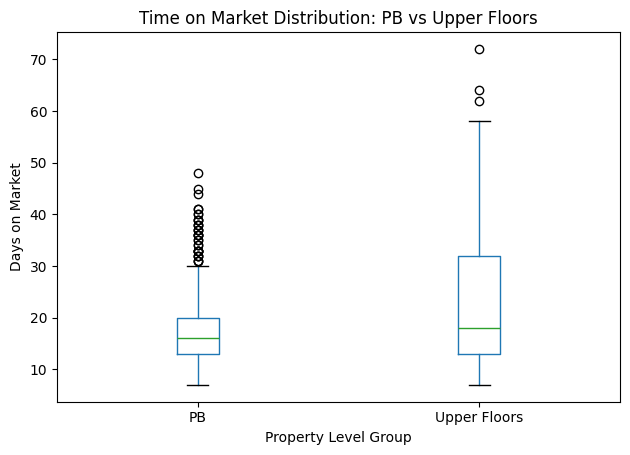

In [34]:
# Plot boxplot of days on market by floor level
plt.figure(figsize=(6,5))

df_pb_dist.boxplot(
    column="days_on_market",
    by="floor_group",
    grid=False
)

plt.title("Time on Market Distribution: PB vs Upper Floors")
plt.suptitle("")
plt.xlabel("Property Level Group")
plt.ylabel("Days on Market")
plt.tight_layout()
plt.show()

**Insight:**  

While the average Time on Market difference between PB and upper-floor units is moderate, the distribution analysis reveals a clearer liquidity risk pattern. Upper-floor apartments exhibit a wider dispersion and significantly higher extreme outliers, with several cases exceeding 60–70 days on market.

PB units also present slow cases, but their distribution is more compact and concentrated around the median. This suggests that PB properties not only tend to sell slightly faster, but more importantly, reduce the probability of severe capital lock-in.

At this stage of the analysis, it becomes evident that Time on Market is not driven by a single characteristic. Liquidity emerges from the interaction of multiple features.


### Question — Does having parking reduce Time on Market?

Parking availability is a key demand driver in CDMX due to congestion, security, and daily usability. Properties without parking often face a smaller buyer pool, potentially increasing holding time.

To test this hypothesis, we compare Time on Market between apartments with parking and those without parking.



In [35]:
#Query to analyze average days on market by parking availability
df_parking = pd.read_sql("""
SELECT 
    CASE 
        WHEN parking_spots > 0 THEN 'With Parking'
        ELSE 'No Parking'
    END AS parking_group,
    ROUND(AVG(days_on_market), 2) AS avg_days_on_market,
    COUNT(*) AS total_properties
FROM properties
GROUP BY parking_group
""", conn)

df_parking



,parking_group,avg_days_on_market,total_properties
0,No Parking,27.10,357
1,With Parking,19.19,797


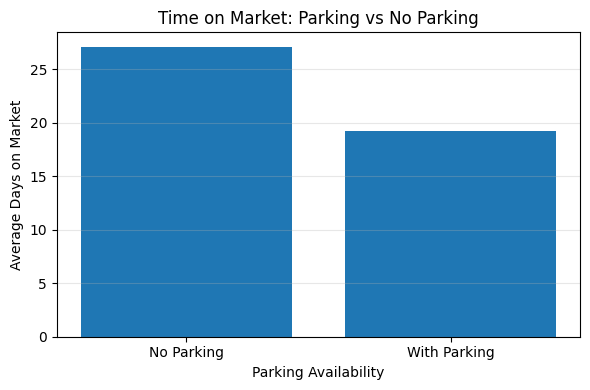

In [36]:
# Plot average days on market by parking availability

plt.figure(figsize=(6,4))
plt.bar(df_parking["parking_group"], df_parking["avg_days_on_market"])
plt.xlabel("Parking Availability")
plt.ylabel("Average Days on Market")
plt.title("Time on Market: Parking vs No Parking")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [37]:
#Query to extract days on market data with parking availability
df_parking_dist = pd.read_sql("""
SELECT 
    CASE 
        WHEN parking_spots > 0 THEN 'With Parking'
        ELSE 'No Parking'
    END AS parking_group,
    days_on_market
FROM properties
""", conn)

df_parking_dist.head()


,parking_group,days_on_market
0,With Parking,7
1,With Parking,22
2,With Parking,10
3,No Parking,30
4,With Parking,18


<Figure size 600x500 with 0 Axes>

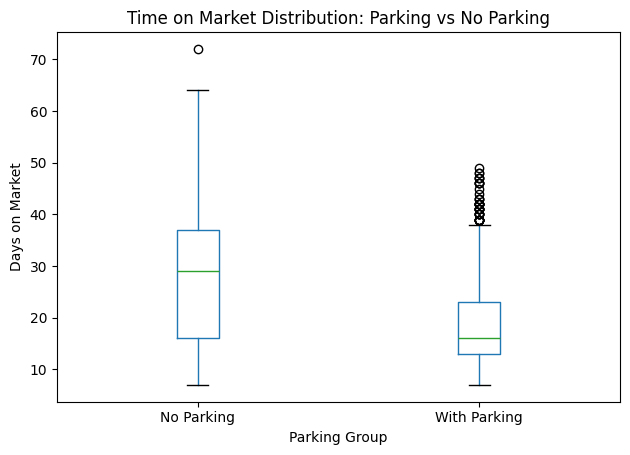

In [38]:
# Plot boxplot of days on market by parking availability

plt.figure(figsize=(6,5))

df_parking_dist.boxplot(
    column="days_on_market",
    by="parking_group",
    grid=False
)

plt.title("Time on Market Distribution: Parking vs No Parking")
plt.suptitle("")
plt.xlabel("Parking Group")
plt.ylabel("Days on Market")
plt.tight_layout()
plt.show()


**Insight:**  

Parking availability introduces the strongest liquidity effect observed so far. Properties with parking average around 19 days on market, compared to approximately 27 days for units without parking, representing a meaningful reduction in holding time.

The distribution analysis reinforces this effect. While no single feature eliminates slow-moving cases, apartments with parking exhibit shorter and less severe outliers, with maximum delays around ~50 days compared to ~70 days for non-parking units.

This indicates that parking not only accelerates typical sales but also reduces downside liquidity risk. From a flipping perspective, parking is a structural demand driver that materially improves capital rotation efficiency.


### Question — Does proximity to metro reduce Time on Market?

Accessibility is a major demand driver in CDMX, especially for mid and lower-priced apartments. Proximity to metro stations increases daily usability and expands the buyer pool.

To evaluate this effect, we analyze whether apartments located near a metro station exhibit shorter Time on Market and lower liquidity risk compared to those without nearby metro access.


In [39]:
#Query to analyze average days on market by proximity to metro
df_metro = pd.read_sql("""
SELECT 
    CASE 
        WHEN near_metro = 1 THEN 'Near Metro'
        ELSE 'Not Near Metro'
    END AS metro_group,
    ROUND(AVG(days_on_market), 2) AS avg_days_on_market,
    COUNT(*) AS total_properties
FROM properties
GROUP BY metro_group
""", conn)

df_metro


,metro_group,avg_days_on_market,total_properties
0,Near Metro,19.94,615
1,Not Near Metro,23.58,539


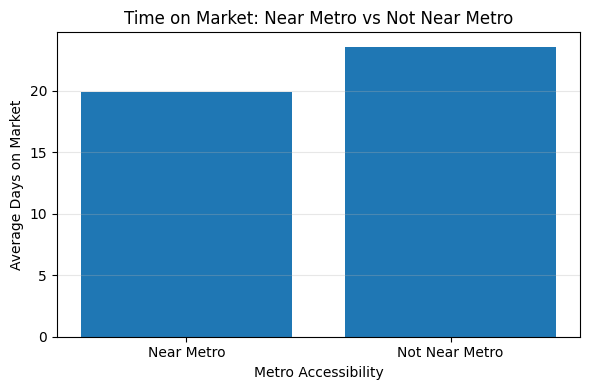

In [40]:
# Plot average days on market by proximity to metro

plt.figure(figsize=(6,4))
plt.bar(df_metro["metro_group"], df_metro["avg_days_on_market"])
plt.xlabel("Metro Accessibility")
plt.ylabel("Average Days on Market")
plt.title("Time on Market: Near Metro vs Not Near Metro")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [41]:
#Query to extract days on market data with metro proximity
df_metro_dist = pd.read_sql("""
SELECT 
    CASE 
        WHEN near_metro = 1 THEN 'Near Metro'
        ELSE 'Not Near Metro'
    END AS metro_group,
    days_on_market
FROM properties
""", conn)

df_metro_dist.head()


,metro_group,days_on_market
0,Near Metro,7
1,Near Metro,22
2,Near Metro,10
3,Near Metro,30
4,Not Near Metro,18


<Figure size 600x500 with 0 Axes>

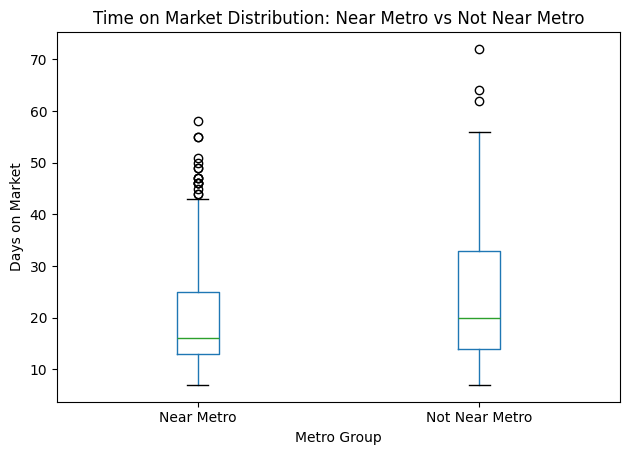

In [42]:
# Plot boxplot of days on market by metro proximity

plt.figure(figsize=(6,5))

df_metro_dist.boxplot(
    column="days_on_market",
    by="metro_group",
    grid=False
)

plt.title("Time on Market Distribution: Near Metro vs Not Near Metro")
plt.suptitle("")
plt.xlabel("Metro Group")
plt.ylabel("Days on Market")
plt.tight_layout()
plt.show()


**Insight:**  

Proximity to metro stations introduces a modest but consistent liquidity effect. Apartments near metro show slightly lower average Time on Market compared to those without nearby transit access, indicating improved accessibility expands the buyer pool.

However, the distribution analysis reveals that near-metro properties still present long right tails and slow-moving outliers. This confirms that while metro proximity contributes to faster rotation, it does not eliminate liquidity risk by itself.

At this stage, the analysis reinforces that Time on Market in the CDMX flipping market is multifactorial — no single feature dominates liquidity behavior.

### Question — What defines a liquid property profile? (Multifactor Analysis)

Previous analysis showed that Time on Market is not driven by a single feature, but by the interaction of multiple characteristics. Instead of evaluating variables in isolation, we now reverse the problem.

We identify the core market by selecting properties within the interquartile range (Q1–Q3) of Time on Market, representing typical, healthy liquidity behavior. We then analyze which features dominate among these faster-rotating properties to infer the profile of a liquid flipping product.


In [43]:
#Calculate interquartile range for days on market
q1 = df_clean["days_on_market"].quantile(0.25)
q3 = df_clean["days_on_market"].quantile(0.75)

q1, q3


(np.float64(13.0), np.float64(31.0))

In [44]:
#Filter dataframe to include only properties within the interquartile range of days on market
df_core = df_clean[
    (df_clean["days_on_market"] >= q1) &
    (df_clean["days_on_market"] <= q3)
]

df_core.shape


(652, 25)

In [45]:
#Take core market dataframe and load into new SQL table
df_core.to_sql("core_market", conn, if_exists="replace", index=False)


652

### From Marginal Effects to Structural Profiles

Previous analysis showed that no single feature explains Time on Market. TOM behaves as a multifactorial phenomenon. Therefore, instead of analyzing isolated variables, we construct composite advantage profiles using features that showed marginal benefits.

By combining these attributes, we evaluate how much of the liquid market they explain and whether these profiles structurally reduce TOM dispersion and tail risk.


In [46]:
#Query to identify properties with competitive advantages
df_advantage = pd.read_sql("""
SELECT *
FROM core_market
WHERE parking_spots > 0
  AND level = 'PB'
  AND near_metro = 1
""", conn)

df_advantage.shape


(69, 25)

In [47]:
#calculate ratio of properties with competitive advantages to core market properties
adv_count = len(df_advantage)
core_count = len(df_core)

adv_ratio = round(adv_count / core_count * 100, 2)

adv_ratio


10.58

### Core Market Coverage of Advantage Profiles

After identifying marginal advantages (parking availability, ground floor positioning, metro proximity and medium-sized layouts), we constructed a composite **advantage profile** to evaluate how much of the liquid market actually satisfies these conditions simultaneously.

The results show that only **~10.58% of the core market** matches this combined profile.

This finding is critical from a business perspective:

- While individual features improve liquidity, their intersection is rare.
- Most fast-moving properties succeed through different combinations rather than a single dominant formula.
- The CDMX flipping market is therefore structurally heterogeneous — liquidity emerges from multiple viable product configurations, not from one universal template.

For investors and operators, this implies that focusing exclusively on a rigid “perfect property” model may unnecessarily limit deal flow.

### Liquidity Landscape: Mapping Speed vs Pricing Efficiency

Previous sections showed that Time on Market (TOM) is multifactorial. No single feature or feature combination fully explains liquidity behavior.

In this section, we construct a *Liquidity Landscape* where each point represents a property feature segment rather than individual listings. The goal is to visualize how different characteristics balance two core business dimensions:

- **Speed**: Average Time on Market (days).
- **Pricing Efficiency**: Average price deviation relative to market benchmarks.

This visualization allows us to identify which features live in efficient zones of the market — rotating capital quickly while preserving price quality — and which trade speed for discounting or vice versa.

Instead of searching for a single perfect formula, the landscape approach reveals how multiple product configurations compete across liquidity and pricing performance.


In [48]:
#querys to select average days on market and price discount for each competitive advantage segment
pb_stats = pd.read_sql("""
SELECT 
    'Ground Floor' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE level = 'PB'
""", conn)

parking_stats = pd.read_sql("""
SELECT 
    'Parking Available' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE parking_spots > 0
""", conn)

metro_stats = pd.read_sql("""
SELECT 
    'Near Metro' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE near_metro = 1
""", conn)

size_stats = pd.read_sql("""
SELECT 
    'Medium Size' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE area_m2 BETWEEN 70 AND 100
""", conn)


In [49]:
#concatenate all segment stats into a single dataframe 
df_landscape = pd.concat([pb_stats, parking_stats, metro_stats, size_stats])
df_landscape


,segment,avg_tom,avg_price_delta,n
0,Ground Floor,18.405109,0.003803,274
0,Parking Available,19.191970,0.004809,797
0,Near Metro,19.938211,0.005729,615
0,Medium Size,22.063380,0.007937,426


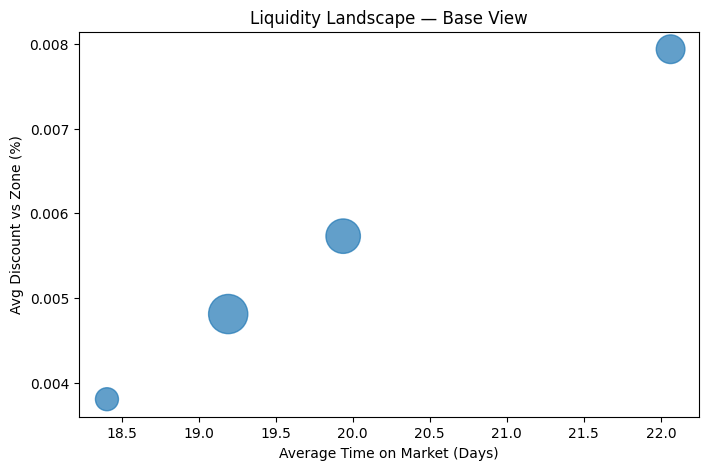

In [50]:
#plot liquidity landscape with average time on market on x-axis and average price discount on y-axis, with point size representing number of properties in each segment
plt.figure(figsize=(8,5))

plt.scatter(
    df_landscape["avg_tom"],
    df_landscape["avg_price_delta"],
    s=df_landscape["n"],
    alpha=0.7
)

plt.xlabel("Average Time on Market (Days)")
plt.ylabel("Avg Discount vs Zone (%)")
plt.title("Liquidity Landscape — Base View")

plt.show()


### Liquidity Landscape — Sweet Spot Features

This first version of the Liquidity Landscape focuses on features that previously showed marginal advantages in Time on Market. Each point represents a feature segment and is positioned by two business dimensions:

- **X-axis (Speed):** Average Time on Market (days).
- **Y-axis (Pricing Efficiency):** Average discount relative to zone benchmarks.
- **Bubble Size:** Segment weight (number of listings).

This visualization highlights the **sweet spot zone** of the market: product configurations that rotate capital faster while minimizing price concessions.

At this stage, the chart intentionally shows only advantaged features. The objective is not to describe the full market, but to understand where efficiency concentrates when speed and pricing discipline align.

Later sections will introduce contrast by adding underperforming segments, allowing us to observe how different product types trade off between liquidity and discounting.


### Liquidity Landscape — Adding Market Contrast

After identifying advantaged features (sweet spot), the next step is to introduce **contrast**. Storytelling in analytics is not only about showing what works, but also what creates friction.

In this version of the Liquidity Landscape, we add underperforming segments to compare how different product configurations trade off between:

- Speed (Time on Market)
- Pricing efficiency (Discount vs zone)
- Market relevance (segment size)

By placing efficient and inefficient features in the same space, we can visually detect where liquidity concentrates and where capital gets trapped.


In [51]:
#stats for segments with competitive disadvantages
no_parking_stats = pd.read_sql("""
SELECT 
    'No Parking' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE parking_spots = 0
""", conn)

not_pb_stats = pd.read_sql("""
SELECT 
    'Not Ground Floor' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE level != 'PB'
""", conn)

far_metro_stats = pd.read_sql("""
SELECT 
    'Far From Metro' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE near_metro = 0
""", conn)

large_size_stats = pd.read_sql("""
SELECT 
    'Large Size' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE area_m2 > 110
""", conn)


In [52]:
#concatenate all segment stats into a single dataframe for contrast with competitive advantage segments
df_contrast = pd.concat([
    df_landscape, 
    no_parking_stats, 
    not_pb_stats, 
    far_metro_stats, 
    large_size_stats
])

df_contrast


,segment,avg_tom,avg_price_delta,n
0,Ground Floor,18.405109,0.003803,274
0,Parking Available,19.191970,0.004809,797
0,Near Metro,19.938211,0.005729,615
0,Medium Size,22.063380,0.007937,426
0,No Parking,27.095238,0.013155,357
0,Not Ground Floor,22.643182,0.008508,880
0,Far From Metro,23.575139,0.009287,539
0,Large Size,21.246114,0.006643,386


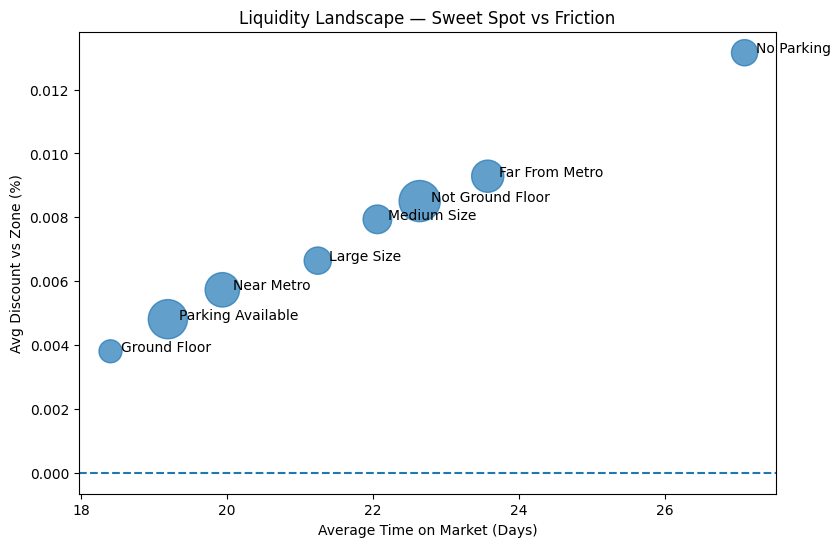

In [53]:
#plot liquidity landscape with competitive advantage and disadvantage segments, with average time on market on x-axis and average price discount on y-axis, with point size representing number of properties in each segment
plt.figure(figsize=(9,6))

plt.scatter(
    df_contrast["avg_tom"],
    df_contrast["avg_price_delta"],
    s=df_contrast["n"],
    alpha=0.7
)

for _, row in df_contrast.iterrows():
    plt.text(row["avg_tom"]+0.15, row["avg_price_delta"], row["segment"])

plt.axhline(0, linestyle="--")
plt.xlabel("Average Time on Market (Days)")
plt.ylabel("Avg Discount vs Zone (%)")
plt.title("Liquidity Landscape — Sweet Spot vs Friction")

plt.show()


## Contrast: From Sweet Spot to Market Friction

Up to this point, the Liquidity Landscape focused on features associated with faster sales and lower discount pressure — the market “sweet spot”.  

However, good analysis requires contrast. A feature only becomes meaningful when compared against what *slows down* liquidity.

To strengthen the interpretation, we introduce friction features such as:
- Properties without parking,  
- Units far from metro access,  
- Non-ground-floor apartments,  
- Larger sizes that may reduce buyer pools.

By placing both advantage and disadvantage features in the same space, the landscape evolves from a descriptive chart into a decision-oriented view.

This contrast allows us to observe not only what helps properties sell faster, but also what systematically increases time on market and pricing pressure, revealing that liquidity is shaped by trade-offs rather than single variables.


In [54]:
#stats for segments with other competitive advantages or disadvantages
renovated_stats = pd.read_sql ("""
SELECT 
    'Renovated' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE property_condition = 'renovated'
""", conn)

good_stats = pd.read_sql("""
SELECT 
    'Good Condition' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE property_condition = 'good'
""", conn)

fair_poor_stats = pd.read_sql("""
SELECT 
    'Fair / Poor' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE property_condition IN ('fair','poor')
""", conn)

premium_stats = pd.read_sql("""
SELECT 
    'Above Zone Price' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE zone_avg_price_m2 > price_m2

""", conn)


small_size_stats = pd.read_sql("""
SELECT 
    'Small Size' AS segment,
    AVG(days_on_market) AS avg_tom,
    AVG(final_discount_pct) AS avg_price_delta,
    COUNT(*) AS n
FROM properties
WHERE area_m2 < 70
""", conn)



In [55]:
#concatenate all segment stats into a single dataframe for contrast with competitive advantage segments
df_contrast = pd.concat([
    df_contrast,
    renovated_stats,
    good_stats,
    fair_poor_stats,
    premium_stats,
    small_size_stats
])

df_contrast


,segment,avg_tom,avg_price_delta,n
0,Ground Floor,18.405109,0.003803,274
0,Parking Available,19.191970,0.004809,797
0,Near Metro,19.938211,0.005729,615
0,Medium Size,22.063380,0.007937,426
0,No Parking,27.095238,0.013155,357
0,Not Ground Floor,22.643182,0.008508,880
0,Far From Metro,23.575139,0.009287,539
0,Large Size,21.246114,0.006643,386
0,Renovated,19.178322,0.004144,286
0,Good Condition,17.497449,0.003361,392


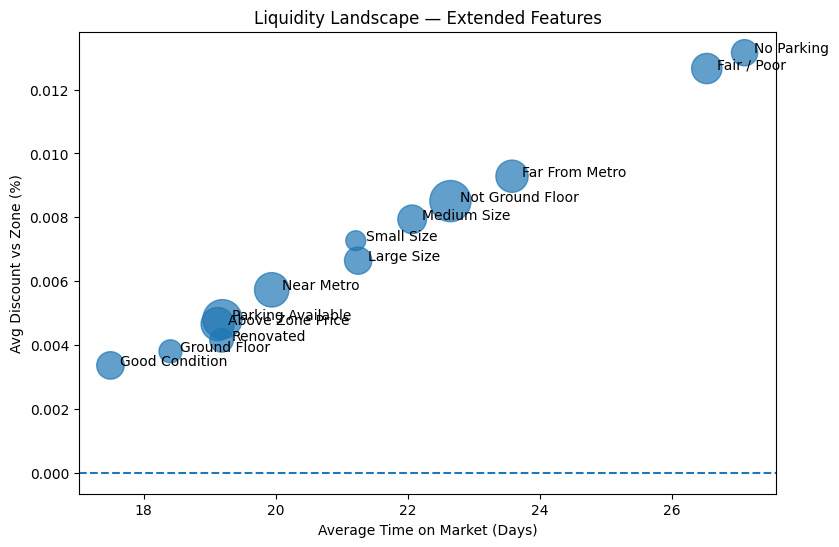

In [56]:
#plot liquidity landscape with competitive advantage and disadvantage segments, with average time on market on x-axis and average price discount on y-axis, with point size representing number of properties in each segment
plt.figure(figsize=(9,6))

plt.scatter(
    df_contrast["avg_tom"],
    df_contrast["avg_price_delta"],
    s=df_contrast["n"],
    alpha=0.7
)

for _, row in df_contrast.iterrows():
    plt.text(row["avg_tom"]+0.15, row["avg_price_delta"], row["segment"])

plt.axhline(0, linestyle="--")
plt.xlabel("Average Time on Market (Days)")
plt.ylabel("Avg Discount vs Zone (%)")
plt.title("Liquidity Landscape — Extended Features")

plt.show()


### Liquidity Landscape — Interpreting the Market

The extended Liquidity Landscape shows how Time on Market and price discounts move together across different property features. In simple terms, properties that take longer to sell usually require larger discounts to close a deal.

Instead of isolated effects, the chart suggests a friction gradient: as product quality, accessibility or configuration worsen, capital rotates more slowly and pricing pressure increases.

Two segments could behave more like *signals* than single drivers:

- **Renovated**
- **Above Zone Price**

These features tend to sit close to other advantaged segments such as parking, ground floor and metro access. This indicates they often bundle multiple good characteristics rather than acting alone. A renovated unit, for example, usually also has better layout, condition and positioning.

In practice, the market does not reward one feature at a time. Liquidity in the CDMX flipping market comes from combining execution quality, accessibility and correct pricing, not from optimizing a single variable.


### Liquidity Landscape — Executive Layer

This section builds on previous versions by adding reference lines and an efficiency zone to guide interpretation without removing earlier analytical views.


In [57]:
# Reference lines for quadrants

x_ref = df_contrast["avg_tom"].mean()
y_ref = df_contrast["avg_price_delta"].mean()


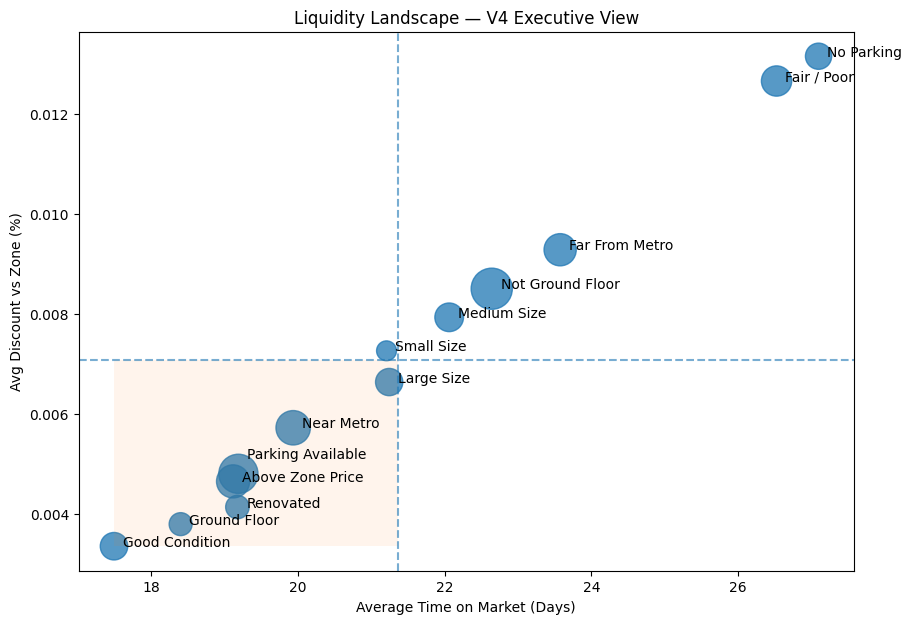

In [58]:
#plot liquidity landscape with competitive advantage and disadvantage segments, with average time on market on x-axis and average price discount on y-axis, with point size representing number of properties in each segment, and reference lines for quadrants
plt.figure(figsize=(10,7))

# Base scatter
plt.scatter(
    df_contrast["avg_tom"],
    df_contrast["avg_price_delta"],
    s=df_contrast["n"],
    alpha=0.75
)

# Labels
for _, row in df_contrast.iterrows():
    x = row["avg_tom"] + 0.12
    y = row["avg_price_delta"]

    if row["segment"] == "Parking Available":
        y = y + 0.0003   # move up

    plt.text(x, y, row["segment"])


# Quadrant reference lines
plt.axvline(x_ref, linestyle="--", alpha=0.6)
plt.axhline(y_ref, linestyle="--", alpha=0.6)

# Sweet spot shading (bottom-left zone)
plt.fill_betweenx(
    y=[df_contrast["avg_price_delta"].min(), y_ref],
    x1=df_contrast["avg_tom"].min(),
    x2=x_ref,
    alpha=0.08
)

# Axis labels and title
plt.xlabel("Average Time on Market (Days)")
plt.ylabel("Avg Discount vs Zone (%)")
plt.title("Liquidity Landscape — V4 Executive View")

plt.show()


In [61]:
#save final liquidity landscape figure with reference lines and annotations
plt.savefig("", dpi=150, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

### Scope and Practical Use

This Liquidity Landscape aggregates properties across multiple boroughs, price ranges and micro-markets within CDMX. While this provides a structural view of how features interact with liquidity, it also mixes different local dynamics into a single map.

In real investment decisions, this type of analysis becomes more powerful when applied to **specific zones and budget segments**. A landscape built at the colonia level, or within a defined price band, would compare more homogeneous products and reveal clearer operational signals.

In practice, this visualization works as a **strategic roadmap** rather than a direct buy signal: it shows which characteristics tend to support faster rotation and better pricing, and how they trade off against friction. Investors can then replicate the same logic inside a focused market slice (e.g. one neighborhood and one budget range) to guide acquisition decisions with higher precision.
